In [1]:
import os
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans





$\huge{\textbf{\underline{Latent Semantic Indexing}}}$ 

In [2]:
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        documents = file.read().split('\n')
    return documents

def preprocess_data(documents):
    vectorizer = CountVectorizer(stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(documents)
    return vectorizer.get_feature_names_out(), doc_term_matrix

def create_lsa_model(doc_term_matrix, number_of_topics):
    lsa_model = TruncatedSVD(n_components=number_of_topics)
    lsa_topic_matrix = lsa_model.fit_transform(doc_term_matrix)
    return lsa_model, lsa_topic_matrix

def print_topics(model, feature_names, number_of_words):
    for i, topic in enumerate(model.components_):
        print(f"Top {number_of_words} words for topic #{i}:")
        print([feature_names[i] for i in topic.argsort()[-number_of_words:]])

def plot_lsa_topics(lsa_topic_matrix, number_of_topics):
    """
    Input  : LSA topic matrix and number of topics
    Purpose: create a scatter plot to visualize the documents and their topic distribution
    """
    df = pd.DataFrame(lsa_topic_matrix, columns=[f'Topic {i}' for i in range(number_of_topics)])
    df['dominant_topic'] = df.idxmax(axis=1)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df, x='Topic 0', y='Topic 1', hue='dominant_topic', palette='viridis')
    plt.title('LSA Topic Visualization')
    plt.show()

def plot_random_topics(number_of_documents, number_of_topics):
    """
    Input  : Number of documents and number of topics
    Purpose: create a scatter plot to visualize random documents and their topic distribution
    """
    lsa_topic_matrix = [[random.random() for _ in range(number_of_topics)] for _ in range(number_of_documents)]
    df = pd.DataFrame(lsa_topic_matrix, columns=[f'Topic {i}' for i in range(number_of_topics)])
    df['dominant_topic'] = df.idxmax(axis=1)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df, x='Topic 0', y='Topic 1', hue='dominant_topic', palette='viridis')
    plt.title('Random Topic Visualization')
    plt.show()

def cosine_similarity(vec1, vec2):
    """
    Calculate cosine similarity between two vectors.
    """
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    similarity = dot_product / (norm1 * norm2)
    return similarity

In [3]:
file_path = 'NewsTextData.txt'
documents = load_data(file_path)
feature_names, doc_term_matrix = preprocess_data(documents)
lsa_model, lsa_topic_matrix = create_lsa_model(doc_term_matrix, number_of_topics=7)
print_topics(lsa_model, feature_names, number_of_words=10)

# plot_lsa_topics(lsa_topic_matrix, number_of_topics=7)

Top 10 words for topic #0:
['donald', 'eu', 'new', 'itâ', 'campaign', 'people', 'clinton', 'says', 'said', 'trump']
Top 10 words for topic #1:
['leicester', 'liverpool', 'dec', 'apr', 'manchester', 'west', 'united', '2017', '2016', 'city']
Top 10 words for topic #2:
['referendum', 'government', 'said', 'britain', 'cameron', 'brexit', 'leave', 'uk', 'says', 'eu']
Top 10 words for topic #3:
['vote', 'uk', 'campaign', 'cameron', 'leave', '2016', '2017', 'said', 'trump', 'eu']
Top 10 words for topic #4:
['britain', 'vote', 'goal', 'ball', 'cameron', 'campaign', 'leave', 'trump', 'eu', 'min']
Top 10 words for topic #5:
['cameron', 'cruz', 'rubio', 'itâ', 'like', 'eu', 'sanders', 'iâ', 'people', 'says']
Top 10 words for topic #6:
['autumn', 'clinton', 'trump', 'hammond', 'tax', 'budget', 'statement', 'government', 'min', 'says']


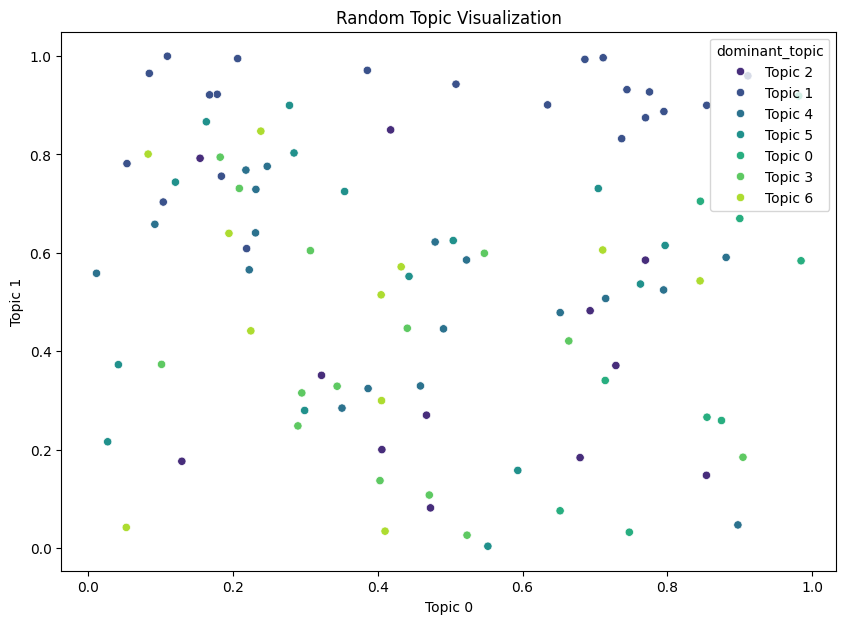

In [4]:
number_of_documents = 100
number_of_topics = 7
plot_random_topics(number_of_documents, number_of_topics)


In [5]:
# search query:
search_query = "economic growth forecast"


# Convert search query to vector using the same vectorizer as the document-term matrix
vectorizer = CountVectorizer(stop_words='english', vocabulary=feature_names)
query_vector = vectorizer.transform([search_query]).toarray()[0]

# Time the computation in the original space
start_time_original = time.time()
# Cosine similarity in the original space
original_cosine_similarities = [cosine_similarity(query_vector, doc) for doc in doc_term_matrix.toarray()]
end_time_original = time.time()

# Reduced space
lsa_model_reduced, lsa_topic_matrix_reduced = create_lsa_model(doc_term_matrix, number_of_topics=2)

# Project query onto the reduced space
query_reduced = lsa_model_reduced.transform(query_vector.reshape(1, -1))

# Project documents onto the reduced space
docs_reduced = lsa_model_reduced.transform(doc_term_matrix)

# Time the computation in the reduced space
start_time_reduced = time.time()
# Cosine similarity in the reduced space
reduced_cosine_similarities = [cosine_similarity(query_reduced, doc) for doc in docs_reduced]
end_time_reduced = time.time()

# Find the indices of the top 3 documents with highest cosine similarity in the reduced space
top_3_indices_reduced = np.argsort(reduced_cosine_similarities)[-3:]

# Create a DataFrame for the documents
df = pd.DataFrame({'Document': documents})

# Print the content of the first document from the top 3 documents in the reduced space
print("\nContent of the first document from the top 3 documents in the reduced space:")
print(df.iloc[top_3_indices_reduced[0]]['Document'])

# Print time taken for computations
print(f"\nTime taken in the original space: {end_time_original - start_time_original} seconds")
print(f"Time taken in the reduced space: {end_time_reduced - start_time_reduced} seconds")


C:\Users\cgwel\AppData\Local\Temp\ipykernel_18828\1379230734.py:53: RuntimeWarning: invalid value encountered in scalar divide
  similarity = dot_product / (norm1 * norm2)



Content of the first document from the top 3 documents in the reduced space:
0    Barclays' defiance of US fines has merit Barcl...
Name: Document, dtype: object

Time taken in the original space: 17.912696599960327 seconds
Time taken in the reduced space: 0.04630231857299805 seconds


C:\Users\cgwel\AppData\Local\Temp\ipykernel_18828\1379230734.py:53: RuntimeWarning: invalid value encountered in divide
  similarity = dot_product / (norm1 * norm2)


$\huge{\textbf{\underline{Clustering}}}$

In [6]:

def cluster_documents(lsa_topic_matrix, num_clusters):

    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans_model.fit_predict(lsa_topic_matrix)
    return kmeans_model, cluster_labels

def visualize_clusters(lsa_topic_matrix, cluster_labels):
  
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=pd.DataFrame(lsa_topic_matrix, columns=[f'Topic {i}' for i in range(lsa_topic_matrix.shape[1])]), 
                    x='Topic 0', y='Topic 1', hue=cluster_labels, palette='viridis')
    plt.title('Cluster Visualization')
    plt.show()

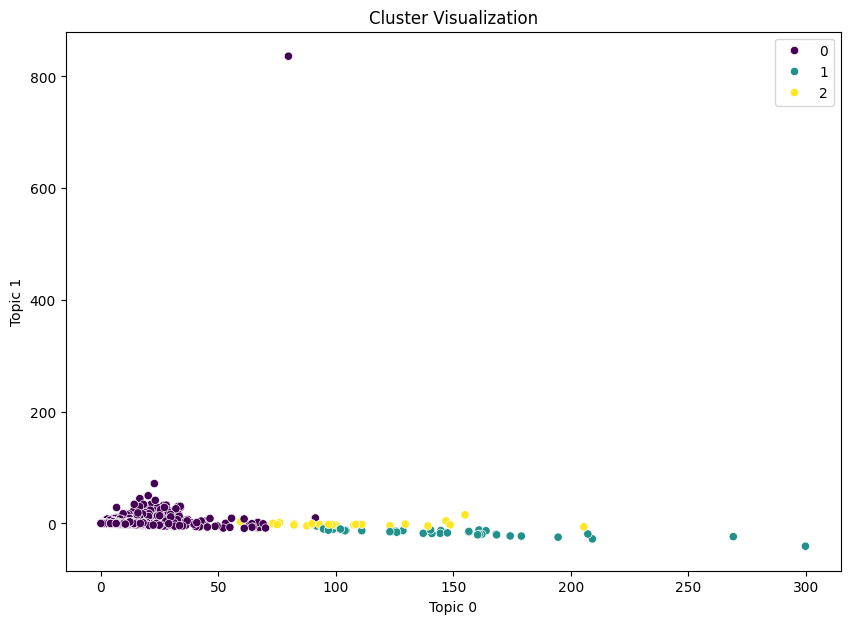

In [7]:
num_clusters = 3  
lsa_model, lsa_topic_matrix = create_lsa_model(doc_term_matrix, number_of_topics)
kmeans_model, cluster_labels = cluster_documents(lsa_topic_matrix, num_clusters)
visualize_clusters(lsa_topic_matrix, cluster_labels)


$\textbf{Purple Cluster}$ (0): This cluster is densely packed and located at the lower left corner of the plot, primarily between 0-50 on Topic 0 axis and 0-100 on Topic 1 axis. This suggests that the documents in this cluster have low scores for both Topic 0 and Topic 1.

$\textbf{Green Cluster}$ (1): This cluster appears slightly more spread out than the purple one and is located above the purple cluster, mainly between Topic 0 values of around 10-70 and Topic 1 values of approximately 100-300. This suggests that the documents in this cluster have moderate scores for Topic 0 and higher scores for Topic 1.

$\textbf{Yellow Cluster}$ (2): This cluster has data points that are widely dispersed across a large range of values on both axes; however, most points seem to be concentrated towards higher values on both Topic 0 (around 60-125)

$\huge{\textbf{\underline{Modules}}}$

$$\textbf{\underline{Scikit-learn}}$$
Abbreviated as sklearn, is an open-source machine learning library for Python. It provides a wide range of tools for various machine learning tasks such as classification, regression, clustering, dimensionality reduction, and more.
Sklearn is built on top of other scientific computing libraries in Python, such as NumPy, SciPy, and matplotlib. 

$\textbf{CountVectorizer}$:

It is used for converting a collection of text documents into a matrix of token counts. In simple terms, it transforms text data into numerical feature vectors suitable for machine learning algorithms.
CountVectorizer converts a collection of text documents into a matrix where each row represents a document and each column represents a unique word in the corpus. The value at each cell indicates the frequency of the word in the corresponding document.

$\textbf{TruncatedSVD}$:

It is used for dimensionality reduction. Specifically, it performs truncated Singular Value Decomposition (SVD) on the input data.
TruncatedSVD is often used for reducing the dimensionality of sparse data, such as text data represented by a CountVectorizer matrix. It retains only the top singular vectors, effectively reducing the dimensionality of the input data while preserving as much variance as possible.

$\textbf{KMeans}$:

It is used for clustering data into K clusters based on feature similarity.
KMeans works by partitioning the data points into K clusters where each data point belongs to the cluster with the nearest mean. It iteratively refines the cluster centroids until convergence, aiming to minimize the within-cluster sum of squares.